## Aprendizado Não Supervisionado - Redução de Dimensionalidade
#### Prof. Thomas da Silva Paula

### UMAP - Demo 1

* Utilização do algoritmo UMAP em caso de uso com imagens.
* Base de dados MNIST, muito comum para exemplos

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import umap

from sklearn.datasets import load_digits
from sklearn.datasets import fetch_mldata

%matplotlib inline

plt.rcParams['figure.figsize'] = (14, 8)

sns.set(font_scale=2)

### Carregar a base de dados e inspecionar algumas informações

In [2]:
digits = load_digits()
print(digits.data.shape)
print(digits.images.shape)
print(np.unique(digits.target, return_counts=True))

(1797, 64)
(1797, 8, 8)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))


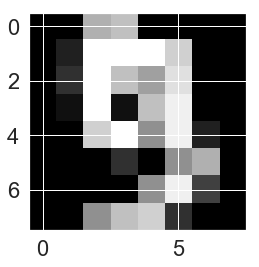

In [3]:
plt.gray()
plt.imshow(digits.images[9])

### Aplicar UMAP

In [4]:
digits_transformed = umap.UMAP(n_neighbors=5).fit_transform(digits.data)
print(digits_transformed.shape)

C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


(1797, 2)


In [5]:
df = pd.DataFrame(digits_transformed, columns=['x', 'y'])
df['label'] = digits.target
df.head()

x          y  label
0  18.085503   0.949281      0
1   7.164777  -4.248134      1
2   4.346714  -0.442601      2
3  -4.221568   4.571448      3
4   7.231824 -13.024693      4

### Plotar resultados

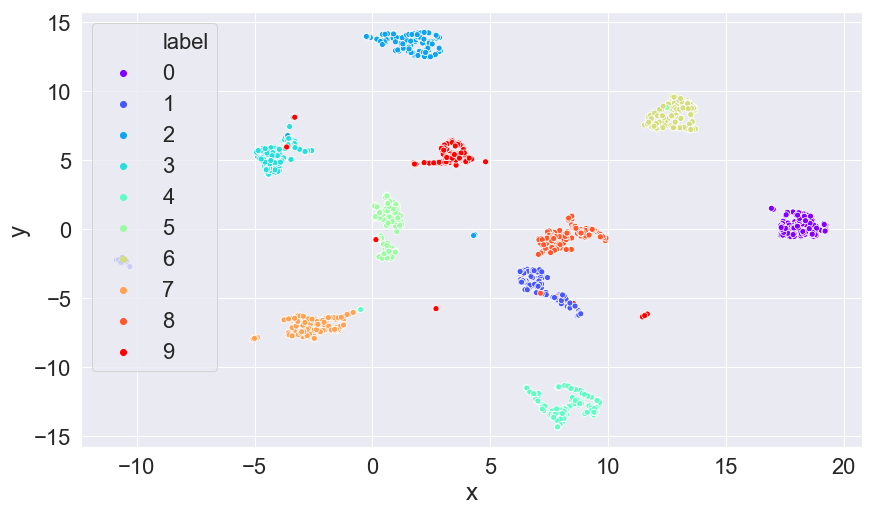

In [8]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend='full')

### Testando hiperparâmetros

Variando n_neighbors

In [9]:
def run_umap_and_plot(n_neighbors, digits):
    digits_transformed = umap.UMAP(n_neighbors=n_neighbors).fit_transform(digits.data)
    
    df = pd.DataFrame(digits_transformed, columns=['x', 'y'])
    df['label'] = digits.target
    
    _ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend='full')

C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 399 separate connected components using meta-embedding (experimental)
  n_components
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


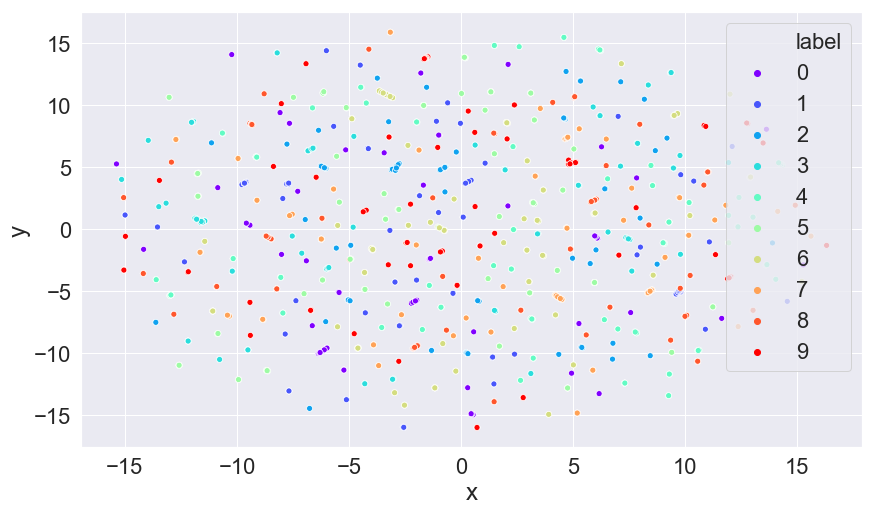

In [11]:
run_umap_and_plot(2, digits)

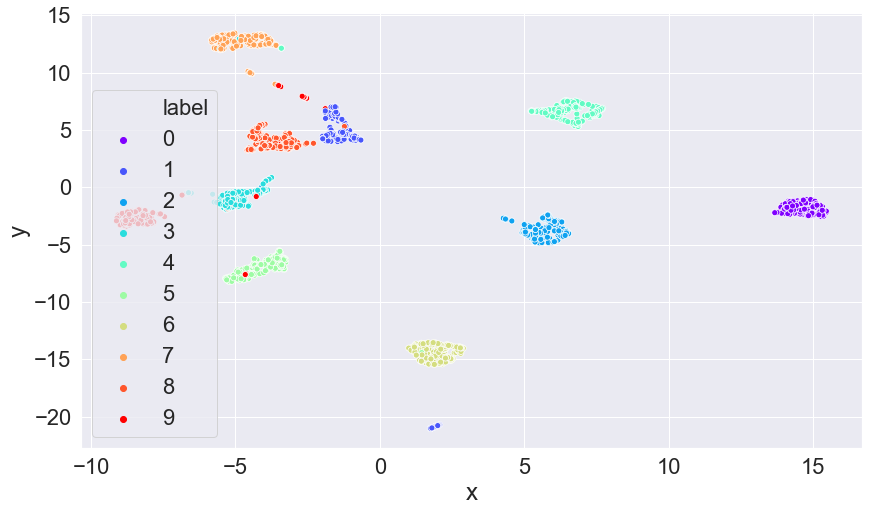

In [12]:
run_umap_and_plot(10, digits)

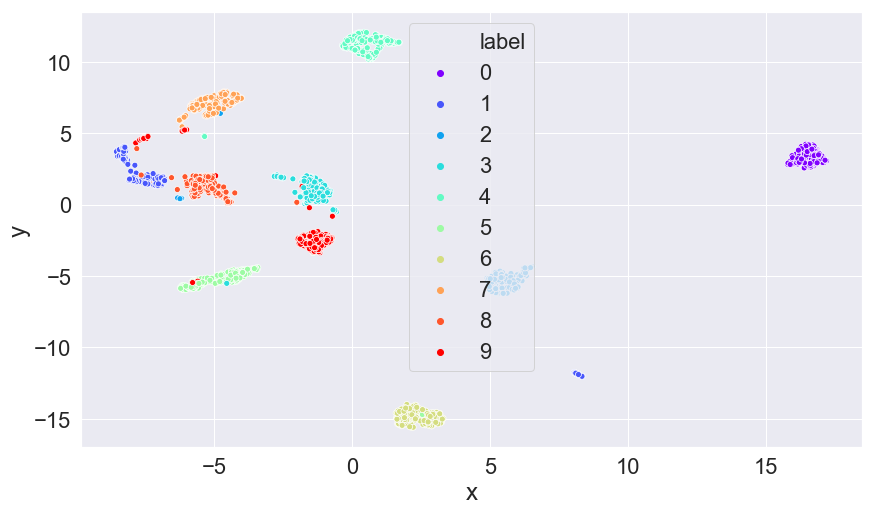

In [13]:
run_umap_and_plot(20, digits)

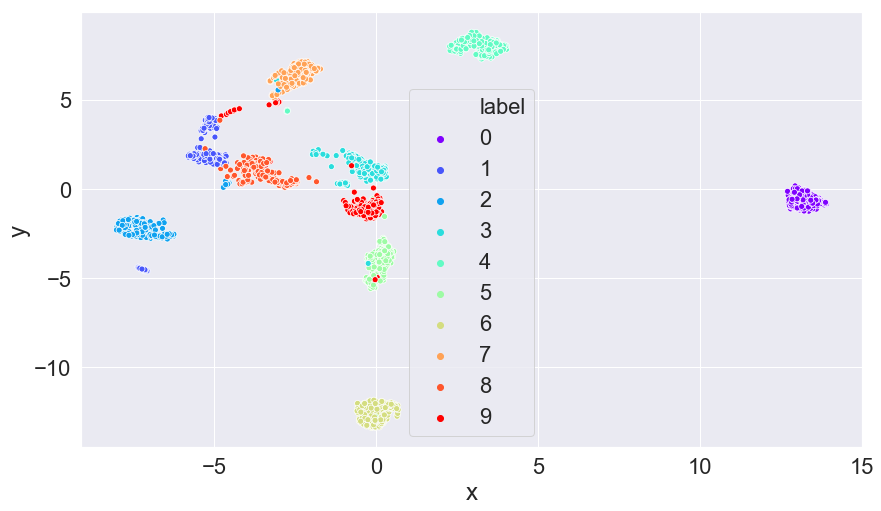

In [14]:
run_umap_and_plot(50, digits)